In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [23]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all" # to make jupyter print all outputs, not just the last one
from IPython.core.display import HTML # to pretty print pandas df and be able to copy them over (e.g. to ppt slides)

In [24]:
df = pd.read_parquet('cleaned/netflix_parquet')

In [25]:
df
df.iloc[0]
df['review_data'].iloc[0]

,movieId,year,title,review_data
0,1,2003,Dinosaur Planet,"[{'date': 2005-09-06, 'rating': 3.0, 'userId':..."
1,2,2004,Isle of Man TT 2004 Review,"[{'date': 2005-09-05, 'rating': 4.0, 'userId':..."
2,3,1997,Character,"[{'date': 2003-03-29, 'rating': 4.0, 'userId':..."
3,4,1994,Paula Abdul's Get Up & Dance,"[{'date': 2005-09-06, 'rating': 3.0, 'userId':..."
4,5,2004,The Rise and Fall of ECW,"[{'date': 2005-02-08, 'rating': 5.0, 'userId':..."
...,...,...,...,...
768,13508,1999,The League of Gentlemen: Series 1,"[{'date': 2003-12-18, 'rating': 2.0, 'userId':..."
769,13509,1998,Little City,"[{'date': 2003-05-29, 'rating': 3.0, 'userId':..."
770,13510,1959,Last Train from Gun Hill,"[{'date': 2005-09-02, 'rating': 3.0, 'userId':..."
771,13511,1993,Much Ado About Nothing,"[{'date': 2000-10-01, 'rating': 4.0, 'userId':..."


movieId                                                        1
year                                                        2003
title                                            Dinosaur Planet
review_data    [{'date': 2005-09-06, 'rating': 3.0, 'userId':...
Name: 0, dtype: object

array([{'date': datetime.date(2005, 9, 6), 'rating': 3.0, 'userId': '1488844'},
       {'date': datetime.date(2005, 5, 13), 'rating': 5.0, 'userId': '822109'},
       {'date': datetime.date(2005, 10, 19), 'rating': 4.0, 'userId': '885013'},
       {'date': datetime.date(2005, 12, 26), 'rating': 4.0, 'userId': '30878'},
       {'date': datetime.date(2004, 5, 3), 'rating': 3.0, 'userId': '823519'},
       {'date': datetime.date(2005, 11, 17), 'rating': 3.0, 'userId': '893988'},
       {'date': datetime.date(2004, 8, 5), 'rating': 4.0, 'userId': '124105'},
       {'date': datetime.date(2004, 4, 22), 'rating': 3.0, 'userId': '1248029'},
       {'date': datetime.date(2004, 5, 9), 'rating': 4.0, 'userId': '1842128'},
       {'date': datetime.date(2005, 5, 11), 'rating': 3.0, 'userId': '2238063'},
       {'date': datetime.date(2005, 5, 19), 'rating': 4.0, 'userId': '1503895'},
       {'date': datetime.date(2005, 6, 6), 'rating': 5.0, 'userId': '2207774'},
       {'date': datetime.date(2004, 8

### Some general findings about our dataframe:

In [26]:
unique_users = set()  # Using a set to store unique user IDs

# Iterate over each row
for index, row in df.iterrows():
    # Iterate over each dictionary in the 'review_data' column of the current row
    for review_entry in row['review_data']:
        user_id = review_entry.get('userId')  # Extracting 'userId' from the dictionary
        if user_id:  # Check if 'userId' exists in the dictionary
            unique_users.add(user_id)  # Add 'userId' to the set of unique user IDs

amount_of_reviews = list()  # Using a set to store unique user IDs

# Iterate over each row
for index, row in df.iterrows():
    # Iterate over each dictionary in the 'review_data' column of the current row
    for review_entry in row['review_data']:
        user_id = review_entry.get('userId')  # Extracting 'userId' from the dictionary
        if user_id:  # Check if 'userId' exists in the dictionary
            amount_of_reviews.append(user_id)  # Add 'userId' to the set of unique user IDs

print("There are {} reviews in our dataframe.".format(len(amount_of_reviews)))
print("There are {} unique users who have reviewed a movie.".format(len(unique_users)))

There are 3999227 reviews in our dataframe.
There are 417530 unique unique users who have reviewed a movie.


In [28]:
df

,movieId,year,title,review_data
0,1,2003,Dinosaur Planet,"[{'date': 2005-09-06, 'rating': 3.0, 'userId':..."
1,2,2004,Isle of Man TT 2004 Review,"[{'date': 2005-09-05, 'rating': 4.0, 'userId':..."
2,3,1997,Character,"[{'date': 2003-03-29, 'rating': 4.0, 'userId':..."
3,4,1994,Paula Abdul's Get Up & Dance,"[{'date': 2005-09-06, 'rating': 3.0, 'userId':..."
4,5,2004,The Rise and Fall of ECW,"[{'date': 2005-02-08, 'rating': 5.0, 'userId':..."
...,...,...,...,...
768,13508,1999,The League of Gentlemen: Series 1,"[{'date': 2003-12-18, 'rating': 2.0, 'userId':..."
769,13509,1998,Little City,"[{'date': 2003-05-29, 'rating': 3.0, 'userId':..."
770,13510,1959,Last Train from Gun Hill,"[{'date': 2005-09-02, 'rating': 3.0, 'userId':..."
771,13511,1993,Much Ado About Nothing,"[{'date': 2000-10-01, 'rating': 4.0, 'userId':..."


### When were the most movies released?

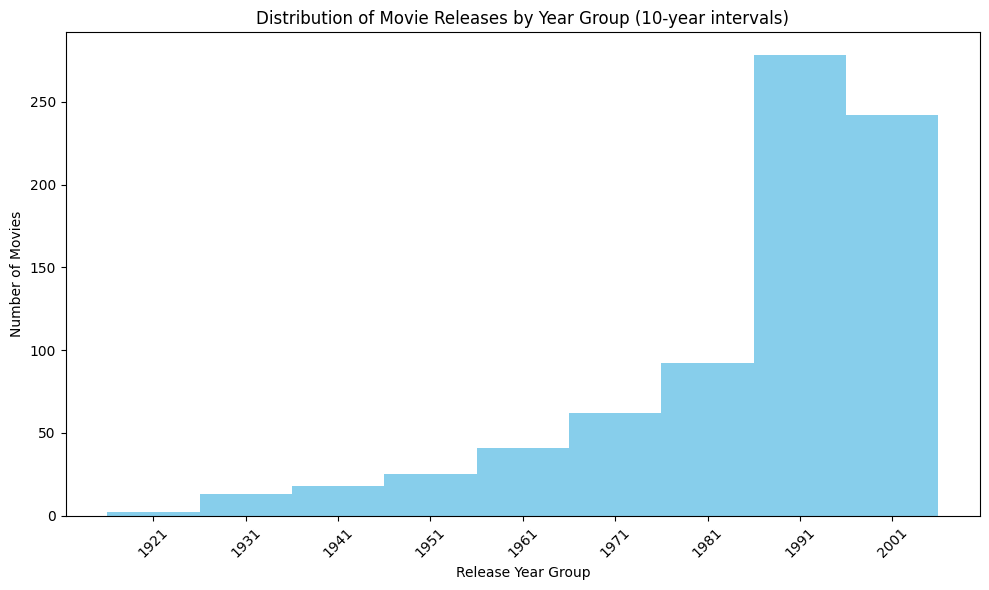

In [31]:
# Define the bin size (10 years)
bin_size = 10

# Extract release years from the 'release_year' column
release_years = (df['year'].astype(int)).tolist()

# Calculate the minimum and maximum release years to determine the range
min_year = min(release_years)
max_year = max(release_years)

# Initialize dictionary to store counts for each bin
bin_counts = {}

# Count the occurrences of each release year within the corresponding bin
for year in release_years:
    bin_index = (year - min_year) // bin_size
    bin_start_year = min_year + bin_index * bin_size
    if bin_start_year in bin_counts:
        bin_counts[bin_start_year] += 1
    else:
        bin_counts[bin_start_year] = 1

# Plot the distribution
plt.figure(figsize=(10, 6))
plt.bar(bin_counts.keys(), bin_counts.values(), color='skyblue', width=bin_size)
plt.xlabel('Release Year Group')
plt.ylabel('Number of Movies')
plt.title('Distribution of Movie Releases by Year Group (10-year intervals)')
plt.xticks(range(min_year, max_year + 1, bin_size), rotation=45)
plt.tight_layout()
plt.show(); # to dont export text output

Seems like most movies have been released around the 90s and the 00s in the dataset.

### When were the most ratings placed?

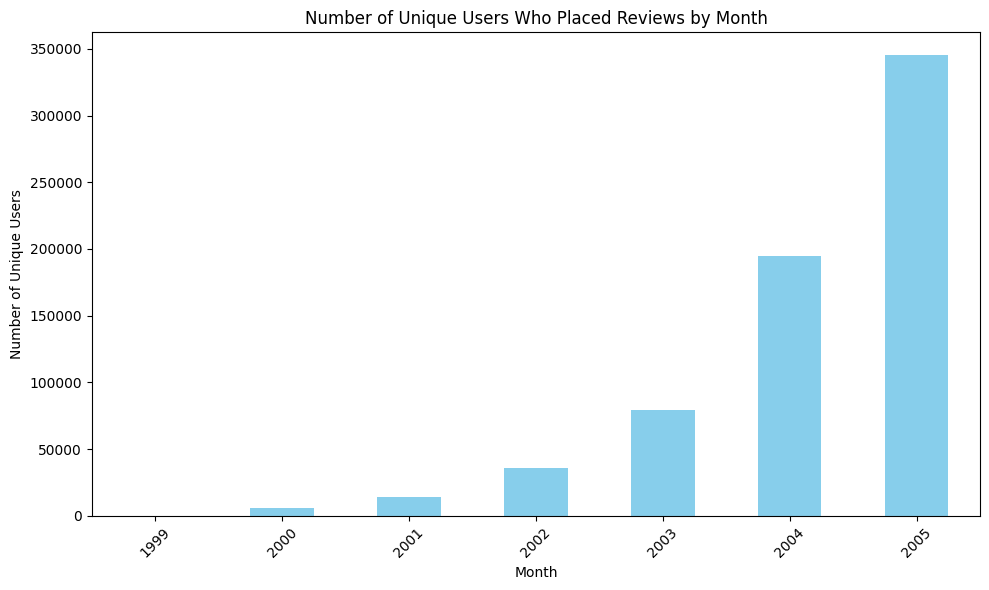

In [34]:
# Extract review dates and user IDs using NumPy
review_data = df['review_data'].values
review_dates = np.concatenate([np.array([entry['date'] for entry in row]) for row in review_data])
user_ids = np.concatenate([np.array([entry['userId'] for entry in row]) for row in review_data])

# Convert review_dates to pandas datetime objects
review_dates = pd.to_datetime(review_dates)

# Create a DataFrame with review dates and user IDs
review_df = pd.DataFrame({'Date': review_dates, 'User_ID': user_ids})

# Group reviews by month and count the number of unique users for each month
monthly_unique_users = review_df.groupby(review_df['Date'].dt.to_period('Y'))['User_ID'].nunique()

# Plot the number of unique users by month
plt.figure(figsize=(10, 6))
monthly_unique_users.plot(kind='bar', color='skyblue')
plt.xlabel('Year')
plt.ylabel('Unique users')
plt.title('Reviews placed by unique users per month')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show();

In 2005, most movies were reviewed by unique users.

### On which days of the week most reviews were placed?

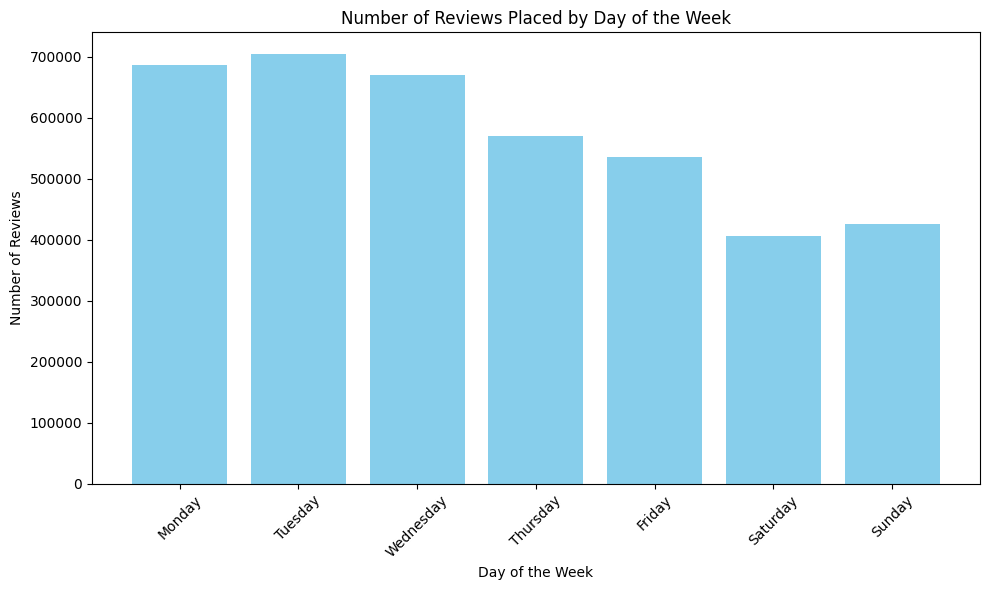

In [35]:
# Get the weekday (0: Monday, 1: Tuesday, ..., 6: Sunday)
weekdays = review_df['Date'].dt.dayofweek

# Count the occurrences of each weekday
weekday_counts = np.bincount(weekdays)

# Plot the distribution of reviews by day of the week
plt.figure(figsize=(10, 6))
plt.bar(range(7), weekday_counts, color='skyblue')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Reviews')
plt.title('Number of Reviews Placed by Day of the Week')
plt.xticks(range(7), ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], rotation=45)
plt.tight_layout()
plt.show();

Most reviews were made on Tuesdays.

### Which movie has the highest average rating?

In [46]:
# Extract review dates, user IDs, and ratings using NumPy
review_data = df['review_data'].values
review_dates = np.concatenate([np.array([entry['date'] for entry in row]) for row in review_data])
user_ids = np.concatenate([np.array([entry['userId'] for entry in row]) for row in review_data])
ratings = np.concatenate([np.array([entry['rating'] for entry in row]) for row in review_data])

# Convert review_dates to pandas datetime objects
review_dates = pd.to_datetime(review_dates)

# Extract movie titles
titles = np.concatenate([[title] * len(row) for title, row in zip(df['title'], review_data)])

# Create a DataFrame with review dates, user IDs, ratings, and movie titles
review_df = pd.DataFrame({'Date': review_dates, 'User_ID': user_ids, 'Rating': ratings, 'Movie_Title': titles})

In [49]:
review_df.groupby('Movie_Title')['Rating'].mean().sort_values(ascending=False).head(10)
print('{} is the best rated movie on average in this dataset.'.format(review_df.groupby('Movie_Title')['Rating'].mean().idxmax()))

Movie_Title
Lord of the Rings: The Return of the King: Extended Edition: Bonus Material    4.552000
House, M.D.: Season 1                                                          4.522613
Full Metal Panic FUMOFFU                                                       4.451456
Elfen Lied                                                                     4.251880
Scrapped Princess                                                              4.237500
Law & Order: Season 3                                                          4.223117
Chappelle's Show: Season 1                                                     4.211192
Queer as Folk: Season 3                                                        4.196017
Babylon 5: A Call to Arms                                                      4.181247
Aqua Teen Hunger Force: Vol. 1                                                 4.168650
Name: Rating, dtype: float64

Lord of the Rings: The Return of the King: Extended Edition: Bonus Material is the best rated movie on average in this dataset.


The most movies contain the genre **drama**.

### With genre is accociated with the most ratings?

### Handle outliers: